In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [125]:
house = pd.read_csv('Dataset/Buah Batu.csv')

In [113]:
house.head()

,Link,Judul,Kecamatan,Lahan Parkir,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga
0,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Rumah Murah Jalan Sunda Asia Afrika Jarang Ada,Antapani,6.0,3.0,4.0,500.0,568.0,Rp11.000.000.000
1,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Rumah Minimalis Siap Huni di pusat kota,Antapani,2.0,5.0,3.0,370.0,259.0,Rp18.000.000.000
2,https://www.lamudi.co.id/jual/jawa-barat/bandu...,JUAL MURAH RUMAH LOKASI PREMIUM DI BANDUNG,Antapani,NaN,8.0,6.0,693.0,1035.0,Rp27.000.000.000
3,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Rumah Industri di Turangga Buahbatu dkt Sailen...,Antapani,2.0,4.0,3.0,131.0,108.0,Rp2.500.000.100
4,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Rumah ready baru industrial diturangga buahbatu,Antapani,2.0,4.0,3.0,131.0,108.0,Rp2.500.000.000


In [66]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Link           630 non-null    object 
 1   Judul          630 non-null    object 
 2   Kecamatan      630 non-null    object 
 3   Lahan Parkir   290 non-null    float64
 4   Kamar Tidur    630 non-null    int64  
 5   Kamar Mandi    630 non-null    int64  
 6   Luas Bangunan  630 non-null    int64  
 7   Luas Tanah     630 non-null    float64
 8   Harga          630 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 44.4+ KB


In [99]:
duplicate = house[house.duplicated(['Judul', 'Lahan Parkir', 'Kamar Tidur', 'Kamar Mandi', 'Luas Tanah', 'Luas Bangunan', 'Harga'])]
duplicate

,Link,Judul,Kecamatan,Lahan Parkir,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga
165,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Jual Cepat Rumah Murah di Puri Ayu Arcamanik D...,Arcamanik,1.0,4.0,3.0,200.0,128.0,Rp1.575.000.000
605,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Dijual rumah siap huni banget lokasi sangat st...,Arcamanik,NaN,3.0,2.0,134.0,124.0,Rp1.400.000.000


In [126]:
house = house.drop_duplicates(subset=['Judul', 'Lahan Parkir', 'Kamar Tidur', 'Kamar Mandi', 'Luas Tanah', 'Luas Bangunan', 'Harga'], keep=False)

In [69]:
house.isna().sum()

Link               0
Judul              0
Kecamatan          0
Lahan Parkir     334
Kamar Tidur        0
Kamar Mandi        0
Luas Bangunan      0
Luas Tanah         0
Harga              0
dtype: int64

In [127]:
house['Lahan Parkir'] =house['Lahan Parkir'].fillna(0)

In [71]:
house.isna().sum()

Link             0
Judul            0
Kecamatan        0
Lahan Parkir     0
Kamar Tidur      0
Kamar Mandi      0
Luas Bangunan    0
Luas Tanah       0
Harga            0
dtype: int64

In [12]:
house.head()

,Link,Judul,Kecamatan,Lahan Parkir,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga
0,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Rumah Murah Jalan Sunda Asia Afrika Jarang Ada,Antapani,6.0,3.0,4.0,500.0,568.0,11000000000
1,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Rumah Minimalis Siap Huni di pusat kota,Antapani,2.0,5.0,3.0,370.0,259.0,18000000000
2,https://www.lamudi.co.id/jual/jawa-barat/bandu...,JUAL MURAH RUMAH LOKASI PREMIUM DI BANDUNG,Antapani,0.0,8.0,6.0,693.0,1035.0,27000000000
3,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Rumah Industri di Turangga Buahbatu dkt Sailen...,Antapani,2.0,4.0,3.0,131.0,108.0,2500000100
4,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Rumah ready baru industrial diturangga buahbatu,Antapani,2.0,4.0,3.0,131.0,108.0,2500000000


In [128]:
house['Harga'] = house['Harga'].str.replace('.', '')
house['Harga'] = house['Harga'].str.replace('Rp', '')
house['Harga'] = house['Harga'].apply(lambda x: int(x))

In [50]:
house.head()

,Link,Judul,Kecamatan,Lahan Parkir,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga
0,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Dijual Rumah Terawat Arcamanik Siap Huni Harga...,Arcamanik,2.0,3.0,2.0,240.0,331.0,2500000000
1,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Rumah siap huni golp arcamanik bandung,Arcamanik,2.0,4.0,2.0,220.0,231.0,2500000000
2,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Dijual rumah murah siap huni di komplek permat...,Arcamanik,1.0,2.0,1.0,61.0,89.0,350000000
3,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Dijual rumah MURAH 575jt MINIMALIS siap huni C...,Arcamanik,1.0,2.0,1.0,45.0,100.0,575000000
4,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Jual Rumah ex cafe Arcamanik Bandung,Arcamanik,0.0,4.0,3.0,137.0,114.0,2400000000


In [129]:
house['Harga (Juta Rupiah)'] = house['Harga'] / 1000000
house['Harga (Juta Rupiah)'] = house['Harga (Juta Rupiah)'].round(2)

In [22]:
house.head()

,Link,Judul,Kecamatan,Lahan Parkir,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga,Harga (Juta Rupiah)
0,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Rumah Murah Jalan Sunda Asia Afrika Jarang Ada,Antapani,6.0,3.0,4.0,500.0,568.0,11000000000,11000.0
1,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Rumah Minimalis Siap Huni di pusat kota,Antapani,2.0,5.0,3.0,370.0,259.0,18000000000,18000.0
2,https://www.lamudi.co.id/jual/jawa-barat/bandu...,JUAL MURAH RUMAH LOKASI PREMIUM DI BANDUNG,Antapani,0.0,8.0,6.0,693.0,1035.0,27000000000,27000.0
3,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Rumah Industri di Turangga Buahbatu dkt Sailen...,Antapani,2.0,4.0,3.0,131.0,108.0,2500000100,2500.0
4,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Rumah ready baru industrial diturangga buahbatu,Antapani,2.0,4.0,3.0,131.0,108.0,2500000000,2500.0


In [23]:
house.describe()

,Lahan Parkir,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga,Harga (Juta Rupiah)
count,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1.060000e+03,1060.000000
mean,1.372642,3.627358,2.476415,148.718868,153.472642,1.891676e+09,1891.676245
std,4.928939,1.520960,1.167069,121.992175,139.193828,2.524858e+09,2524.858023
min,0.000000,1.000000,1.000000,2.000000,37.000000,1.450000e+08,145.000000
25%,0.000000,3.000000,2.000000,80.000000,90.000000,9.500000e+08,950.000000
50%,1.000000,3.000000,2.000000,117.500000,118.000000,1.300000e+09,1300.000000
75%,1.000000,4.000000,3.000000,198.000000,168.000000,1.999250e+09,1999.250000
max,90.000000,14.000000,9.000000,1351.000000,2259.000000,4.500000e+10,45000.000000


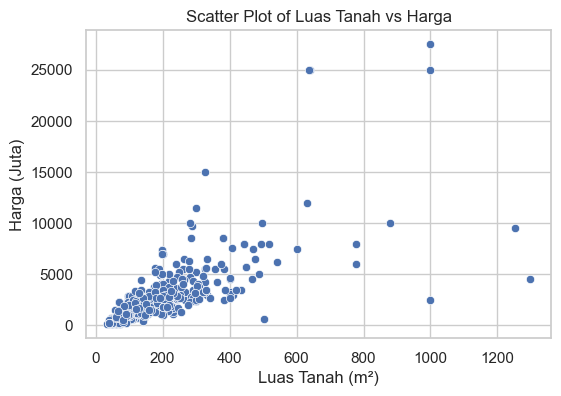

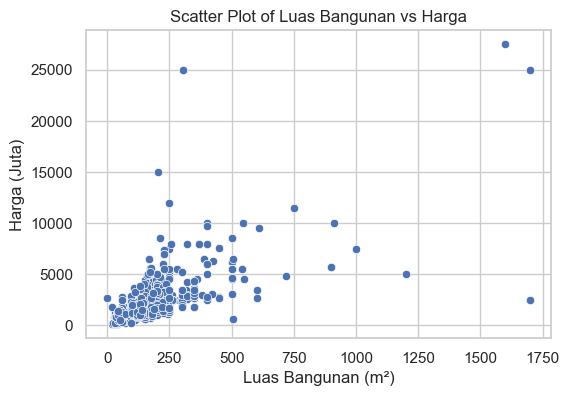

In [74]:
# Set style for the plots
sns.set(style="whitegrid")

# Create a scatter plot for 'Luas Tanah' vs 'Harga'
plt.figure(figsize=(6, 4))
sns.scatterplot(x=house['Luas Tanah'], y=house['Harga (Juta Rupiah)'])
plt.title('Scatter Plot of Luas Tanah vs Harga')
plt.xlabel('Luas Tanah (m²)')
plt.ylabel('Harga (Juta)')
plt.show()

# Create a scatter plot for 'Luas Bangunan' vs 'Harga'
plt.figure(figsize=(6, 4))
sns.scatterplot(x=house['Luas Bangunan'], y=house['Harga (Juta Rupiah)'])
plt.title('Scatter Plot of Luas Bangunan vs Harga')
plt.xlabel('Luas Bangunan (m²)')
plt.ylabel('Harga (Juta)')
plt.show()


In [130]:
# Menghapus outlier menggunakan IQR (Interquartile Range)
Q1 = house['Harga'].quantile(0.25)
Q3 = house['Harga'].quantile(0.75)
IQR = Q3 - Q1
house = house[~((house['Harga'] < (Q1 - 1.5 * IQR)) | (house['Harga'] > (Q3 + 1.5 * IQR)))]

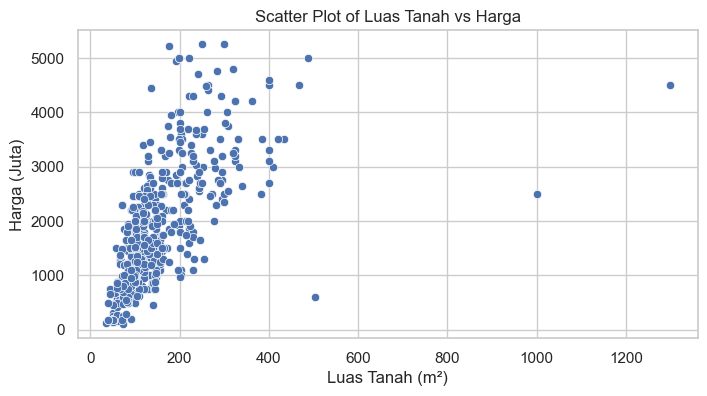

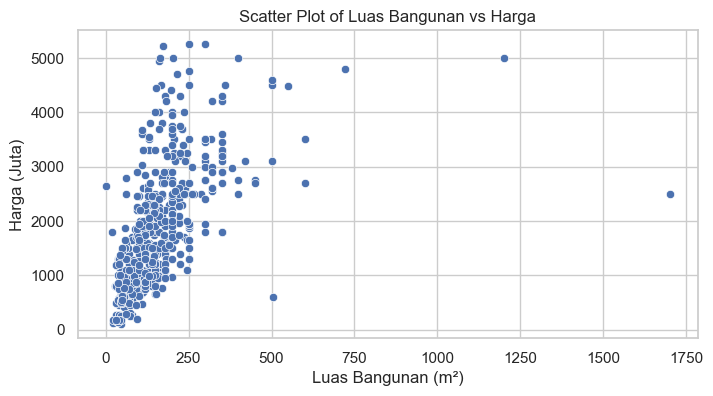

In [76]:
# Set style for the plots
sns.set(style="whitegrid")

# Create a scatter plot for 'Luas Tanah' vs 'Harga'
plt.figure(figsize=(8, 4))
sns.scatterplot(x=house['Luas Tanah'], y=house['Harga (Juta Rupiah)'])
plt.title('Scatter Plot of Luas Tanah vs Harga')
plt.xlabel('Luas Tanah (m²)')
plt.ylabel('Harga (Juta)')
plt.show()

# Create a scatter plot for 'Luas Bangunan' vs 'Harga'
plt.figure(figsize=(8, 4))
sns.scatterplot(x=house['Luas Bangunan'], y=house['Harga (Juta Rupiah)'])
plt.title('Scatter Plot of Luas Bangunan vs Harga')
plt.xlabel('Luas Bangunan (m²)')
plt.ylabel('Harga (Juta)')
plt.show()

In [105]:
outliers = house.loc[house['Luas Tanah'] >= 400]
outliers

,Link,Judul,Kecamatan,Lahan Parkir,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga,Harga (Juta Rupiah)
16,https://www.lamudi.co.id/jual/jawa-barat/bandu...,"arcamanik murah dibawah pasaran, BU CPT, nego",Arcamanik,0.0,7.0,7.0,500.0,425.0,2985000000,2985.0
67,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Langka! Rumah Murah Terawat SHM Bonus 2 Ruko d...,Arcamanik,424.0,5.0,5.0,500.0,424.0,3000000000,3000.0
96,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Rumah Baru Siap Huni Arcamanik Bandung Murah J...,Arcamanik,0.0,3.0,1.0,72.0,748.0,830000000,830.0
104,https://www.lamudi.co.id/jual/jawa-barat/bandu...,"rumah di bawah pasaran, arcamanik, edisi kepepet",Arcamanik,0.0,7.0,6.0,500.0,425.0,3000000000,3000.0
237,https://www.lamudi.co.id/jual/jawa-barat/bandu...,RUMAH LUAS ARCAMANIK,Arcamanik,4.0,3.0,2.0,350.0,400.0,2850000000,2850.0
294,https://www.lamudi.co.id/jual/jawa-barat/bandu...,jual rmh turun harga di arcamanik,Arcamanik,0.0,6.0,6.0,250.0,424.0,3000000000,3000.0
318,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Rumah murah komplek arcamanik endah posisi dpn...,Arcamanik,50.0,7.0,6.0,500.0,424.0,2999000000,2999.0
384,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Rumah Minimalis Strategis Arcamanik Endah Anta...,Arcamanik,0.0,6.0,6.0,400.0,424.0,3000000000,3000.0
403,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Rumah Bagus Arcamanik Dekat Sport Jabar Harga ...,Arcamanik,2.0,3.0,3.0,200.0,410.0,2900000000,2900.0
406,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Rumah Dan Ruko Murah Terawat Arcamanik,Arcamanik,3.0,5.0,5.0,500.0,424.0,3000000000,3000.0


In [131]:
data = house[house['Luas Tanah'] <= 400]

In [120]:
data.describe()

,Lahan Parkir,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga,Harga (Juta Rupiah)
count,973.000000,973.000000,973.000000,973.000000,973.000000,9.730000e+02,973.000000
mean,1.368962,3.476876,2.331963,127.924974,128.053443,1.424531e+09,1424.531490
std,5.049400,1.387306,1.014187,73.323593,58.460894,7.119371e+08,711.937107
min,0.000000,1.000000,1.000000,2.000000,37.000000,1.450000e+08,145.000000
25%,0.000000,3.000000,2.000000,80.000000,90.000000,9.250000e+08,925.000000
50%,1.000000,3.000000,2.000000,110.000000,109.000000,1.299000e+09,1299.000000
75%,1.000000,4.000000,3.000000,170.000000,150.000000,1.750000e+09,1750.000000
max,90.000000,14.000000,9.000000,1001.000000,400.000000,3.500000e+09,3500.000000


In [28]:
data.head()

,Link,Judul,Kecamatan,Lahan Parkir,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga,Harga (Juta Rupiah)
3,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Rumah Industri di Turangga Buahbatu dkt Sailen...,Antapani,2.0,4.0,3.0,131.0,108.0,2500000100,2500.0
4,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Rumah ready baru industrial diturangga buahbatu,Antapani,2.0,4.0,3.0,131.0,108.0,2500000000,2500.0
5,https://www.lamudi.co.id/jual/jawa-barat/bandu...,2UNIT RUMAH BARU MODERN KONSEP INDUSTRIAL DI L...,Antapani,0.0,3.0,3.0,130.0,108.0,2500000000,2500.0
6,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Jual Rumah Muararajeun Katamso Supratman,Antapani,1.0,6.0,3.0,85.0,108.0,890000000,890.0
7,https://www.lamudi.co.id/jual/jawa-barat/bandu...,Rumah Murah Tamansari ITB Cihampelas,Antapani,2.0,3.0,2.0,106.0,96.0,1599900000,1599.9


In [132]:
data = data[data.columns[3:]]
data.head()

,Lahan Parkir,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga,Harga (Juta Rupiah)
0,0.0,4,3,168,264.0,4500000000,4500.0
1,0.0,2,1,29,82.0,810000000,810.0
7,0.0,10,3,146,70.0,2300000000,2300.0
11,1.0,2,2,50,72.0,693504000,693.5
12,1.0,2,2,50,72.0,693504000,693.5


In [108]:
correlation_matrix = data.corr()

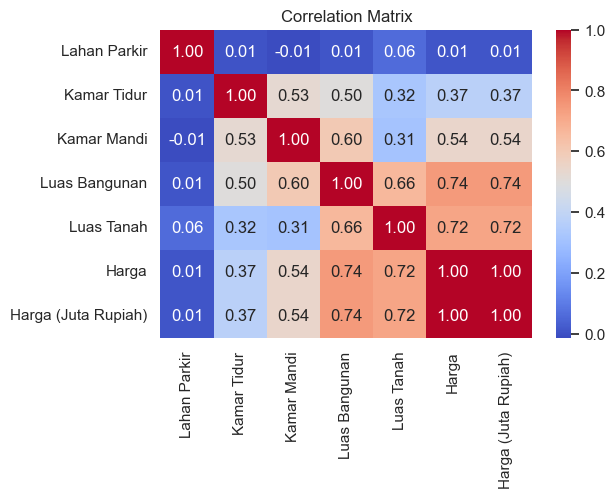

In [109]:
# Buat heatmap
plt.figure(figsize=(6, 4))  # Sesuaikan ukuran figure sesuai kebutuhan
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Tampilkan heatmap
plt.title('Correlation Matrix')
plt.show()

In [78]:
x = data[['Lahan Parkir','Kamar Tidur', 'Kamar Mandi', 'Luas Tanah', 'Luas Bangunan']]
y = data ['Harga']

In [79]:
from sklearn.feature_selection import f_regression

In [80]:
f_regression(x,y)

(array([  1.4213631 , 276.75735199, 408.3815393 , 947.43417093,
        699.04782675]),
 array([2.33470451e-001, 7.20172161e-055, 4.46301420e-076, 9.66444200e-146,
        1.80618746e-116]))

In [81]:
# Since we are more interested in the latter (p-values), we can just take the second array
p_values = f_regression(x,y)[1]
p_values.round(3)

array([0.233, 0.   , 0.   , 0.   , 0.   ])

In [133]:
# Remove column name 'A'
data = data.drop(['Lahan Parkir'], axis=1)

In [134]:
data

,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga,Harga (Juta Rupiah)
0,4,3,168,264.0,4500000000,4500.0
1,2,1,29,82.0,810000000,810.0
7,10,3,146,70.0,2300000000,2300.0
11,2,2,50,72.0,693504000,693.5
12,2,2,50,72.0,693504000,693.5
...,...,...,...,...,...,...
625,3,2,180,90.0,1100000000,1100.0
626,6,5,600,385.0,3500000000,3500.0
627,3,2,200,225.0,3400000000,3400.0
628,5,4,185,130.0,3200000000,3200.0


In [135]:
data.to_csv("Clean Buahbatu.csv",index = False)